In [2]:
import pandas as pd

def get_accident_data(year: str):
    file_name = 'Data/FARS' + year + '/accident.csv'
    df = pd.read_csv(file_name, encoding='windows-1252', low_memory=False)
    return df

In [3]:
def count_accident_by_state(year: str):
    df = get_accident_data(year)
    state_name = df.loc[:,'STATENAME'].tolist()
    accident_in_each_state = dict()
    for states in state_name:
        if states in accident_in_each_state:
            accident_in_each_state[states] += 1
        else:
            accident_in_each_state[states] = 1
    return accident_in_each_state
    

In [4]:
def count_accident_by_whether(year: str):
    df = get_accident_data(year)
    accident_in_each_state_rain = dict()
    accident_in_each_state_no_rain = dict()
    state_weather = df[['STATENAME','WEATHERNAME']]
    for i in range(len(state_weather)):
        if state_weather.loc[i, 'WEATHERNAME'] == 'Rain':
            if state_weather.loc[i, 'STATENAME'] in accident_in_each_state_rain:
                accident_in_each_state_rain[state_weather.loc[i, 'STATENAME']] += 1
            else:
                accident_in_each_state_rain[state_weather.loc[i, 'STATENAME']] = 1
        else:
            if state_weather.loc[i, 'STATENAME'] in accident_in_each_state_no_rain:
                accident_in_each_state_no_rain[state_weather.loc[i, 'STATENAME']] += 1
            else:
                accident_in_each_state_no_rain[state_weather.loc[i, 'STATENAME']] = 1
    return accident_in_each_state_rain, accident_in_each_state_no_rain

In [5]:
print(count_accident_by_whether('2018'))

FileNotFoundError: [Errno 2] No such file or directory: 'Data/FARS2018/accident.csv'

In [ ]:
def count_DUI_accidnent(year: str):
    df = get_accident_data(year)
    DUI_accident = dict()
    state_weather = df[['STATENAME','DRUNK_DR']]
    for i in range(len(state_weather)):
        if state_weather.loc[i, 'DRUNK_DR'] != 0:
            if state_weather.loc[i, 'STATENAME'] in DUI_accident:
                DUI_accident[state_weather.loc[i, 'STATENAME']] += 1
            else:
                DUI_accident[state_weather.loc[i, 'STATENAME']] = 1
    return DUI_accident

In [ ]:
print(count_DUI_accidnent('2018'))

{'Alabama': 206, 'Alaska': 30, 'Arizona': 191, 'Arkansas': 126, 'California': 947, 'Colorado': 192, 'Connecticut': 97, 'Delaware': 27, 'District of Columbia': 5, 'Florida': 628, 'Georgia': 272, 'Hawaii': 27, 'Idaho': 51, 'Illinois': 291, 'Indiana': 138, 'Iowa': 69, 'Kansas': 60, 'Kentucky': 151, 'Louisiana': 209, 'Maine': 41, 'Maryland': 123, 'Massachusetts': 112, 'Michigan': 268, 'Minnesota': 112, 'Mississippi': 108, 'Missouri': 214, 'Montana': 81, 'Nebraska': 61, 'Nevada': 76, 'New Hampshire': 41, 'New Jersey': 116, 'New Mexico': 99, 'New York': 210, 'North Carolina': 357, 'North Dakota': 32, 'Ohio': 296, 'Oklahoma': 147, 'Oregon': 128, 'Pennsylvania': 271, 'Rhode Island': 20, 'South Carolina': 264, 'South Dakota': 39, 'Tennessee': 195, 'Texas': 830, 'Utah': 58, 'Vermont': 19, 'Virginia': 231, 'Washington': 150, 'West Virginia': 57, 'Wisconsin': 203, 'Wyoming': 32}


In [ ]:
def rate_of_DUI(year: str):
    DUI_ratio_by_state = dict()
    DUI_count = count_DUI_accidnent(year)
    accident_count = count_accident_by_state(year)
    for state in DUI_count:
        DUI_ratio_by_state[state] = int(DUI_count[state]) / int(accident_count[state])
    return DUI_ratio_by_state

In [ ]:
print(rate_of_DUI('2018'))

{'Alabama': 0.23515981735159816, 'Alaska': 0.43478260869565216, 'Arizona': 0.20806100217864923, 'Arkansas': 0.2647058823529412, 'California': 0.27173601147776183, 'Colorado': 0.32653061224489793, 'Connecticut': 0.3527272727272727, 'Delaware': 0.25961538461538464, 'District of Columbia': 0.16666666666666666, 'Florida': 0.21528968117929378, 'Georgia': 0.19318181818181818, 'Hawaii': 0.24545454545454545, 'Idaho': 0.2372093023255814, 'Illinois': 0.305993690851735, 'Indiana': 0.17783505154639176, 'Iowa': 0.23711340206185566, 'Kansas': 0.16348773841961853, 'Kentucky': 0.22740963855421686, 'Louisiana': 0.2906815020862309, 'Maine': 0.3228346456692913, 'Maryland': 0.2536082474226804, 'Massachusetts': 0.33136094674556216, 'Michigan': 0.2954796030871003, 'Minnesota': 0.3209169054441261, 'Mississippi': 0.18120805369127516, 'Missouri': 0.25235849056603776, 'Montana': 0.48502994011976047, 'Nebraska': 0.3034825870646766, 'Nevada': 0.25418060200668896, 'New Hampshire': 0.30597014925373134, 'New Jersey'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def histogram_plot_DUI_ratio(year: str):
    DUI_ratio = rate_of_DUI(year)
    pos = np.arange(len(DUI_ratio.keys()))
    width = 0.5     
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(DUI_ratio.keys())
    plt.bar(DUI_ratio.keys(), DUI_ratio.values(), width, color='b')  
    plt.title('Percent of DUI Fatal Accidents in All Fatal Accidents by State'+'('+year+')')
    plt.xlabel('State')
    plt.ylabel('Ratio of DUI Accidents')   
    plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')                 
    plt.show()
    
    

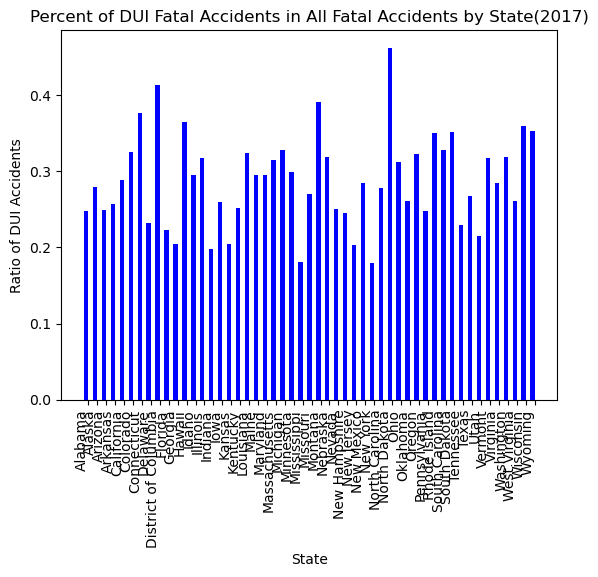

In [ ]:
histogram_plot_DUI_ratio('2017')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def line_plot_DUI_ratio_2015_to_2020(states: list):
    state_ratio = []
    for state in states:
        DUI_ratio = dict()
        DUI_ratio['2015'] = rate_of_DUI('2015')[state]
        DUI_ratio['2016'] = rate_of_DUI('2016')[state]
        DUI_ratio['2017'] = rate_of_DUI('2017')[state]
        DUI_ratio['2018'] = rate_of_DUI('2018')[state]
        DUI_ratio['2019'] = rate_of_DUI('2019')[state]
        DUI_ratio['2020'] = rate_of_DUI('2020')[state]
        state_ratio.append(DUI_ratio)
    num=0
    for state in state_ratio:
        plt.plot(state.keys(), state.values(), marker='', linewidth=1, alpha=0.9, label=states[num])
        num+=1
    plt.legend(loc=2, ncol=2)
    plt.title("DUI Fatal Rate Change from 2015 to 2020", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Year")
    plt.ylabel("DUI Accident Rate")
    plt.show()
    return state_ratio

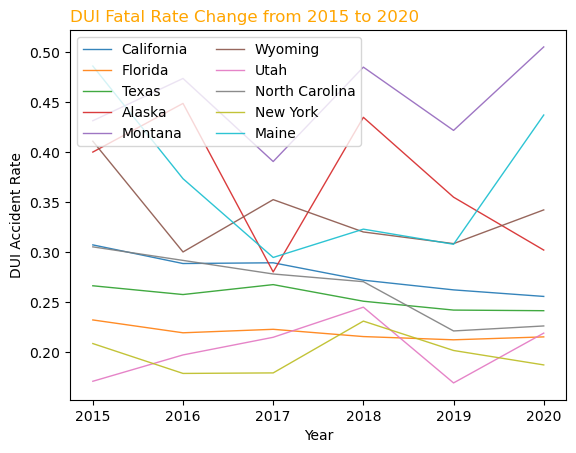

[{'2015': 0.30707652897854626,
  '2016': 0.2884180790960452,
  '2017': 0.2891566265060241,
  '2018': 0.27173601147776183,
  '2019': 0.2620367668514736,
  '2020': 0.2554806070826307},
 {'2015': 0.23193775472397185,
  '2016': 0.21908006814310052,
  '2017': 0.22256410256410256,
  '2018': 0.21528968117929378,
  '2019': 0.21205962059620595,
  '2020': 0.21497740477727567},
 {'2015': 0.26614420062695926,
  '2016': 0.2573679603151444,
  '2017': 0.26730310262529833,
  '2018': 0.2506795530051344,
  '2019': 0.24180825242718446,
  '2020': 0.2411931818181818},
 {'2015': 0.4,
  '2016': 0.44871794871794873,
  '2017': 0.28,
  '2018': 0.43478260869565216,
  '2019': 0.3548387096774194,
  '2020': 0.3018867924528302},
 {'2015': 0.43137254901960786,
  '2016': 0.47368421052631576,
  '2017': 0.3905325443786982,
  '2018': 0.48502994011976047,
  '2019': 0.42168674698795183,
  '2020': 0.5052631578947369},
 {'2015': 0.4108527131782946,
  '2016': 0.3,
  '2017': 0.3523809523809524,
  '2018': 0.32,
  '2019': 0.3083

In [ ]:
line_plot_DUI_ratio_2015_to_2020(["California","Florida", "Texas", "Alaska", "Montana","Wyoming","Utah","North Carolina","New York", "Maine"])

In [5]:
import requests
from bs4 import BeautifulSoup
def search_city_location(search_city: str):
    url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
    content = requests.get(url)
    soup = BeautifulSoup(content.content, 'html.parser')
    for row in soup.find_all('tr'):
        col = row.find_all('td')
        cell_info = []
        if len(col) == 10:
            for cell in col:
                cell_info.append(cell.text.strip())
            city, location= 0, 0
            city = cell_info[0]
            location = cell_info[9]
            if search_city in city:
                location_value = location.split()
                location_value = [location_value[6].replace(';',''),location_value[7].replace('\ufeff','')]
                location_value = [[float(location_value[0])-1, float(location_value[1])-1],[float(location_value[0])+1, float(location_value[1])+1]]
                location_value = [str(location_value[0][0])+','+str(location_value[0][1]), str(location_value[1][0])+','+str(location_value[1][1])]
                return location_value
    return 'city not found'

In [ ]:
print(search_city_location('San Diego'))


['31.810000000000002,-118.13', '33.81,-116.13']


In [3]:
import json
import requests

def get_realtime_accident_data(city: str):
    location = search_city_location(city)
    url = 'https://waze.p.rapidapi.com/alerts-and-jams'
    querystring = {'bottom_left': location[0], 'top_right': location[1]}
    headers = {
        'X-RapidAPI-Key': '30b8dcc7bcmsh269aa8b26f20a9cp18b81fjsnf414ff1c2be6',
        'X-RapidAPI-Host': 'waze.p.rapidapi.com'
    }
    response = requests.get(url, headers=headers, params=querystring)
    response = json.dumps(response.json(), indent=4)
    response = json.loads(response)
    return response

In [6]:
print(get_realtime_accident_data('Los Angeles'))

{'message': 'You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/letscrape-6bRBa3QguO5/api/waze'}


In [ ]:
def count_alert(city: str):
    data = get_realtime_accident_data(search_city_location(city))
    count = 0
    for alert in data['data']['alerts']:
        if alert['type'] == 'ACCIDENT' or alert['type'] == 'HAZARD':
            count += 1
    return count

In [ ]:
print(count_alert('Los Angeles'))

6
